In [37]:
import numpy as np
import pandas as pd
import string
import spacy

In [2]:
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [3]:
#import data set 
data=pd.read_csv("data.csv")

In [4]:
data

review  rating
0     It was nice produt. I like it's design a lot. ...       5
1     awesome sound....very pretty to see this nd th...       5
2     awesome sound quality. pros 7-8 hrs of battery...       4
3     I think it is such a good product not only as ...       5
4     awesome bass sound quality very good bettary l...       5
...                                                 ...     ...
9971                                      GoodREAD MORE       5
9972  Everything is amazimg but the built is very li...       5
9973                                      GoodREAD MORE       5
9974       Best headphone i have ever used....READ MORE       5
9975                                      NiceREAD MORE       5

[9976 rows x 2 columns]

In [5]:
#check for null  value and convert data into string 
data['review'] = data['review'].fillna('').apply(str)
data

review  rating
0     It was nice produt. I like it's design a lot. ...       5
1     awesome sound....very pretty to see this nd th...       5
2     awesome sound quality. pros 7-8 hrs of battery...       4
3     I think it is such a good product not only as ...       5
4     awesome bass sound quality very good bettary l...       5
...                                                 ...     ...
9971                                      GoodREAD MORE       5
9972  Everything is amazimg but the built is very li...       5
9973                                      GoodREAD MORE       5
9974       Best headphone i have ever used....READ MORE       5
9975                                      NiceREAD MORE       5

[9976 rows x 2 columns]

In [6]:
import re  # regular expression

# Clean The Data

def cleantext(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text) # Remove Mentions
    text = re.sub(r"#", "", text) # Remove Hashtags Symbol
    text = re.sub(r"RT[\s]+", "", text) # Remove Retweets
    text = re.sub(r"https?:\/\/\S+", "", text) # Remove The Hyper Link
    
    return text

In [7]:
data["review"] = data["review"].apply(cleantext)
data.head()

review  rating
0  It was nice produt. I like it's design a lot. ...       5
1  awesome sound....very pretty to see this nd th...       5
2  awesome sound quality. pros 7-8 hrs of battery...       4
3  I think it is such a good product not only as ...       5
4  awesome bass sound quality very good bettary l...       5

In [8]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["review"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity
data[["subjectivity", "polarity"]] = data.apply(sentiment_analysis, axis=1)

data

review  rating  subjectivity  \
0     It was nice produt. I like it's design a lot. ...       5      0.777778   
1     awesome sound....very pretty to see this nd th...       5      0.716667   
2     awesome sound quality. pros 7-8 hrs of battery...       4      0.509356   
3     I think it is such a good product not only as ...       5      0.515385   
4     awesome bass sound quality very good bettary l...       5      0.597500   
...                                                 ...     ...           ...   
9971                                      GoodREAD MORE       5      0.500000   
9972  Everything is amazimg but the built is very li...       5      0.400000   
9973                                      GoodREAD MORE       5      0.500000   
9974       Best headphone i have ever used....READ MORE       5      0.400000   
9975                                      NiceREAD MORE       5      0.500000   

      polarity  
0     0.511111  
1     0.591667  
2     0.292731  
3     0.300000  
4     0.351250  
...        ...  
9971  0.500000  
9972  0.350000  
9973  0.500000  
9974  0.750000  
9975  0.500000  

[9976 rows x 4 columns]

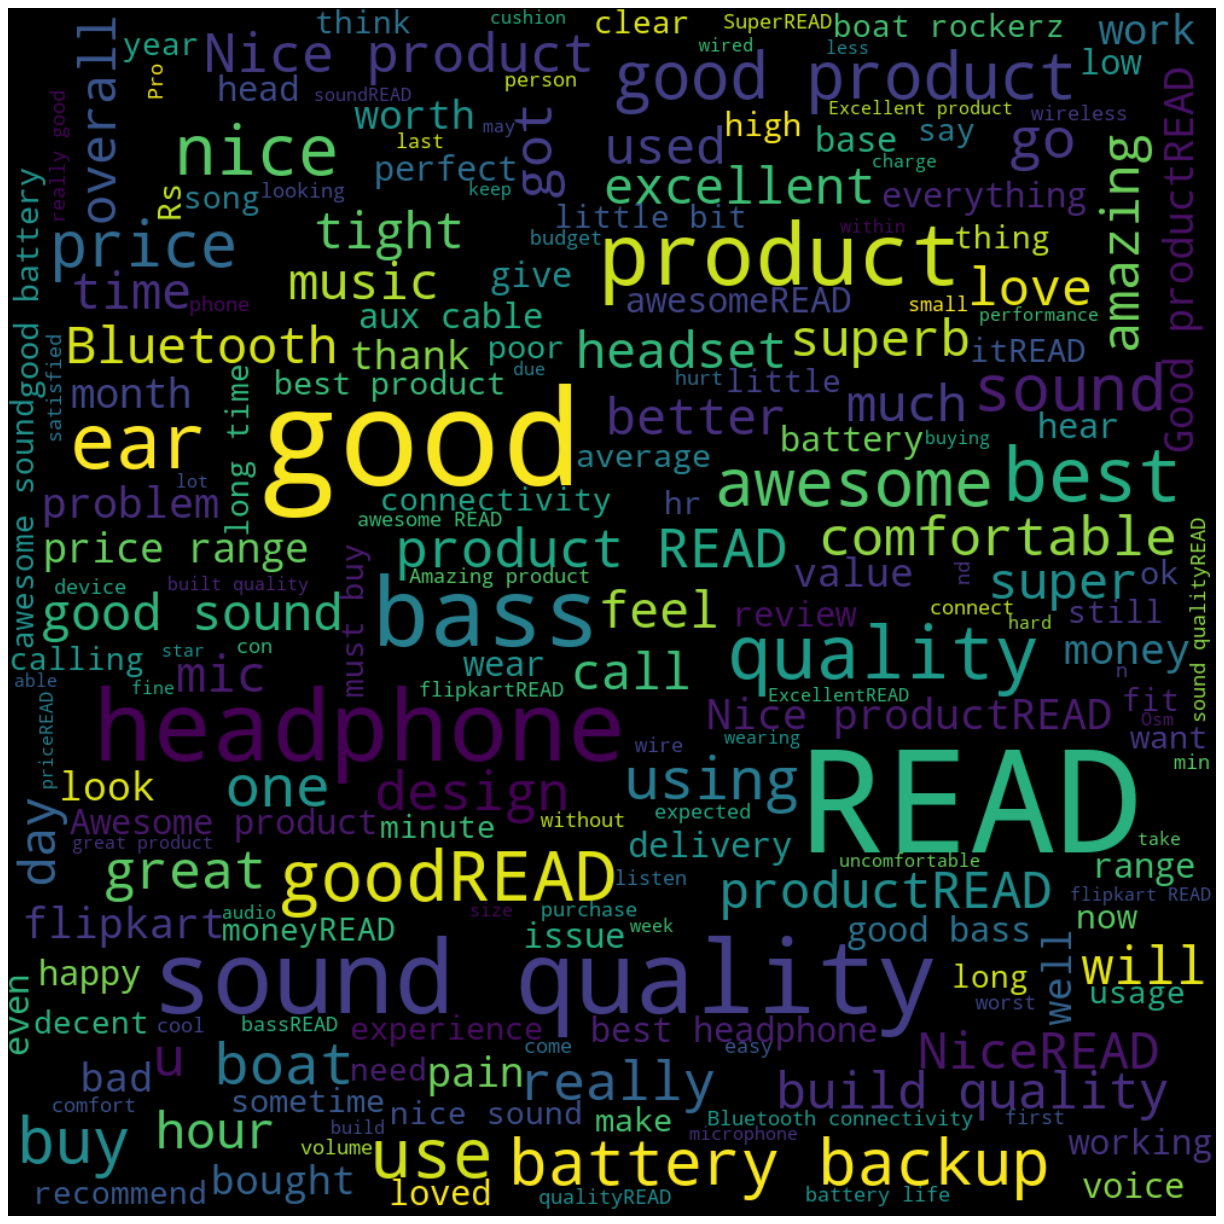

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allwords = " ".join([x for x in data["review"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [10]:
# Compute The Negative, Neutral, Positive Analysis
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
# Create a New Analysis Column
data["analysis"] = data["polarity"].apply(analysis)
# Print The Data
data

review  rating  subjectivity  \
0     It was nice produt. I like it's design a lot. ...       5      0.777778   
1     awesome sound....very pretty to see this nd th...       5      0.716667   
2     awesome sound quality. pros 7-8 hrs of battery...       4      0.509356   
3     I think it is such a good product not only as ...       5      0.515385   
4     awesome bass sound quality very good bettary l...       5      0.597500   
...                                                 ...     ...           ...   
9971                                      GoodREAD MORE       5      0.500000   
9972  Everything is amazimg but the built is very li...       5      0.400000   
9973                                      GoodREAD MORE       5      0.500000   
9974       Best headphone i have ever used....READ MORE       5      0.400000   
9975                                      NiceREAD MORE       5      0.500000   

      polarity  analysis  
0     0.511111  Positive  
1     0.591667  Positive  
2     0.292731  Positive  
3     0.300000  Positive  
4     0.351250  Positive  
...        ...       ...  
9971  0.500000  Positive  
9972  0.350000  Positive  
9973  0.500000  Positive  
9974  0.750000  Positive  
9975  0.500000  Positive  

[9976 rows x 5 columns]

In [11]:
positive_tweets = data[data['analysis'] == 'Positive']
negative_tweets = data[data['analysis'] == 'Negative']

print('positive review')
for i, row in positive_tweets[:5].iterrows():
  print(' -' + row['review'])

  print('negative review')
for i, row in negative_tweets[:5].iterrows():
  print(' -' + row['review'])

positive review
 -It was nice produt. I like it's design a lot.  It's easy to carry. And.   Looked stylish.READ MORE
negative review
 -awesome sound....very pretty to see this nd the sound quality was too good I wish to take this product loved this product 😍😍😍READ MORE
negative review
 -awesome sound quality. pros 7-8 hrs of battery life (including 45 mins approx call time)Awesome sound output. Bass and treble are really very clear without equaliser. With equaliser, sound wary depends on the handset sound quality.Weightless to carry and in head tooMic is good, but in traffic it is not too good (3.25/5)3.5mm Option is really important to mention. Really expecting other leading brands to implement this.ConsVery tight in ears. adjusters are ok .. this ll be very tight...READ MORE
negative review
 -I think it is such a good product not only as per the quality but also the design is quite good . I m using this product from January ... In this pandamic situation it has became the most useful

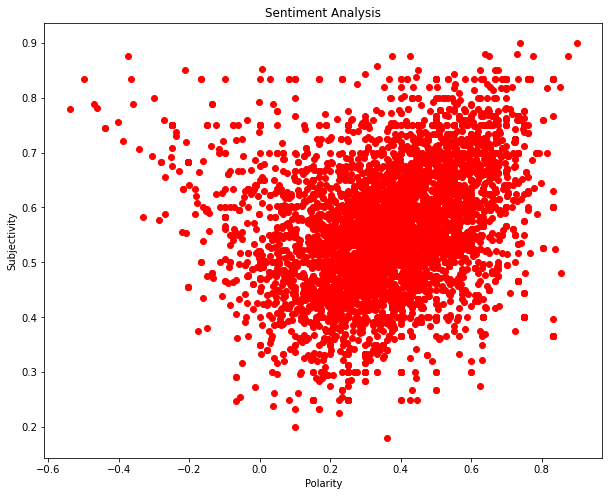

In [12]:
plt.figure(figsize=(10, 8))

for i in range(0, data.shape[0]):
    plt.scatter(data["polarity"][i], data["subjectivity"][i], color = "Red")

plt.title("Sentiment Analysis") # Add The Graph Title
plt.xlabel("Polarity") # Add The X-Label
plt.ylabel("Subjectivity") # Add The Y-Label
plt.show() # Showing The Graph

In [14]:
#text mining on reviews of customer
word = [review.strip() for review in data.review] # remove both the leading and the trailing characters
word

["It was nice produt. I like it's design a lot.  It's easy to carry. And.   Looked stylish.READ MORE",
 'awesome sound....very pretty to see this nd the sound quality was too good I wish to take this product loved this product 😍😍😍READ MORE',
 'awesome sound quality. pros 7-8 hrs of battery life (including 45 mins approx call time)Awesome sound output. Bass and treble are really very clear without equaliser. With equaliser, sound wary depends on the handset sound quality.Weightless to carry and in head tooMic is good, but in traffic it is not too good (3.25/5)3.5mm Option is really important to mention. Really expecting other leading brands to implement this.ConsVery tight in ears. adjusters are ok .. this ll be very tight...READ MORE',
 'I think it is such a good product not only as per the quality but also the design is quite good . I m using this product from January ... In this pandamic situation it has became the most useful and helpful . Overall the bass and the sound quality is p

In [15]:
# Joining the list into one string/text
text = ' '.join(word)
text

'It was nice produt. I like it\'s design a lot.  It\'s easy to carry. And.   Looked stylish.READ MORE awesome sound....very pretty to see this nd the sound quality was too good I wish to take this product loved this product 😍😍😍READ MORE awesome sound quality. pros 7-8 hrs of battery life (including 45 mins approx call time)Awesome sound output. Bass and treble are really very clear without equaliser. With equaliser, sound wary depends on the handset sound quality.Weightless to carry and in head tooMic is good, but in traffic it is not too good (3.25/5)3.5mm Option is really important to mention. Really expecting other leading brands to implement this.ConsVery tight in ears. adjusters are ok .. this ll be very tight...READ MORE I think it is such a good product not only as per the quality but also the design is quite good . I m using this product from January ... In this pandamic situation it has became the most useful and helpful . Overall the bass and the sound quality is pretty good 

In [16]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'It was nice produt I like its design a lot  Its easy to carry And   Looked stylishREAD MORE awesome soundvery pretty to see this nd the sound quality was too good I wish to take this product loved this product 😍😍😍READ MORE awesome sound quality pros 78 hrs of battery life including 45 mins approx call timeAwesome sound output Bass and treble are really very clear without equaliser With equaliser sound wary depends on the handset sound qualityWeightless to carry and in head tooMic is good but in traffic it is not too good 325535mm Option is really important to mention Really expecting other leading brands to implement thisConsVery tight in ears adjusters are ok  this ll be very tightREAD MORE I think it is such a good product not only as per the quality but also the design is quite good  I m using this product from January  In this pandamic situation it has became the most useful and helpful  Overall the bass and the sound quality is pretty good and another thing that will give you suc

In [17]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['It', 'was', 'nice', 'produt', 'I', 'like', 'its', 'design', 'a', 'lot', 'Its', 'easy', 'to', 'carry', 'And', 'Looked', 'stylishREAD', 'MORE', 'awesome', 'soundvery', 'pretty', 'to', 'see', 'this', 'nd', 'the', 'sound', 'quality', 'was', 'too', 'good', 'I', 'wish', 'to', 'take', 'this', 'product', 'loved', 'this', 'product', '😍😍😍READ', 'MORE', 'awesome', 'sound', 'quality', 'pros', '78', 'hrs', 'of', 'battery']


In [18]:
len(text_tokens)

166605

In [19]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pushkar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pushkar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['It', 'nice', 'produt', 'I', 'like', 'design', 'lot', 'Its', 'easy', 'carry', 'And', 'Looked', 'stylishREAD', 'MORE', 'awesome', 'soundvery', 'pretty', 'see', 'nd', 'sound', 'quality', 'good', 'I', 'wish', 'take', 'product', 'loved', 'product', '😍😍😍READ', 'MORE', 'awesome', 'sound', 'quality', 'pros', '78', 'hrs', 'battery', 'life', 'including', '45']


In [20]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['it', 'nice', 'produt', 'i', 'like', 'design', 'lot', 'its', 'easy', 'carry', 'and', 'looked', 'stylishread', 'more', 'awesome', 'soundvery', 'pretty', 'see', 'nd', 'sound', 'quality', 'good', 'i', 'wish', 'take']


In [21]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['it', 'nice', 'produt', 'i', 'like', 'design', 'lot', 'it', 'easi', 'carri', 'and', 'look', 'stylishread', 'more', 'awesom', 'soundveri', 'pretti', 'see', 'nd', 'sound', 'qualiti', 'good', 'i', 'wish', 'take', 'product', 'love', 'product', '😍😍😍read', 'more', 'awesom', 'sound', 'qualiti', 'pro', '78', 'hr', 'batteri', 'life', 'includ', '45']


In [22]:
# NLP english language model of spacy library
nlp = spacy.load('en') 

In [23]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

It nice produt I like design lot Its easy carry And Looked stylishREAD MORE awesome soundvery pretty see nd sound quality good I wish take product loved product 😍😍😍READ MORE awesome sound quality pros 78 hrs battery


In [24]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['-PRON-', 'nice', 'produt', '-PRON-', 'like', 'design', 'lot', '-PRON-', 'easy', 'carry', 'and', 'look', 'stylishREAD', 'more', 'awesome', 'soundvery', 'pretty', 'see', 'nd', 'sound', 'quality', 'good', '-PRON-', 'wish', 'take']


In [25]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

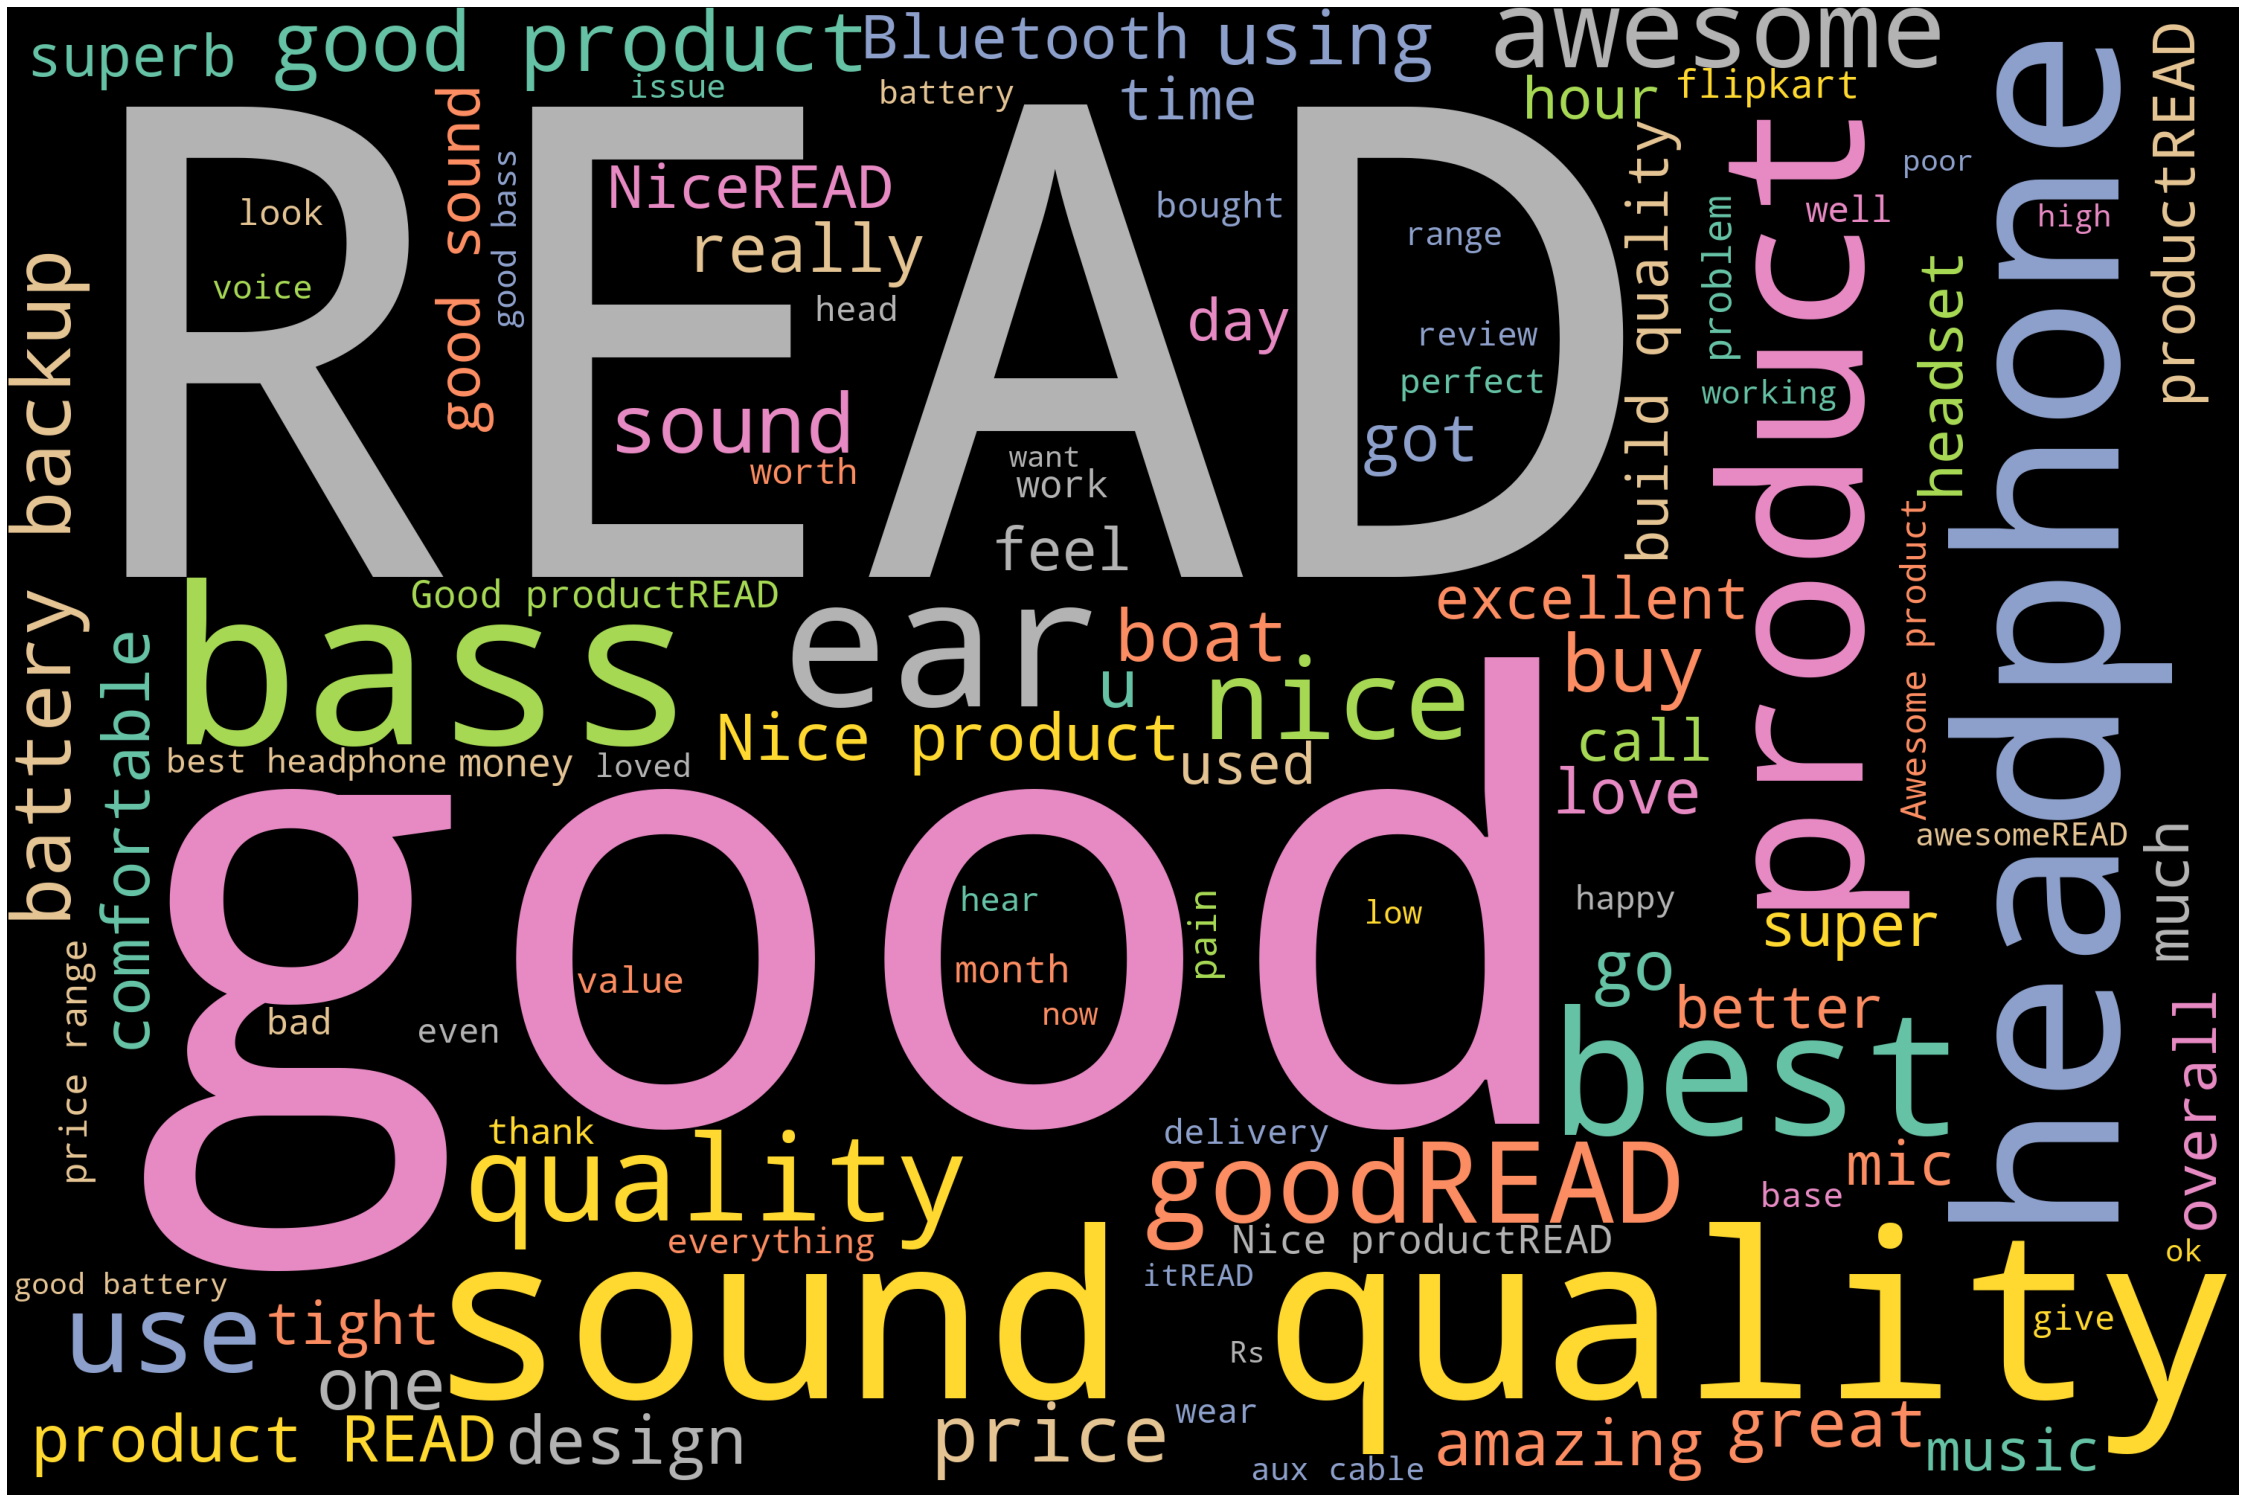

In [26]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [32]:
with open("G:/Data science/assignment/text minning(done)/positive-words.txt","r") as pos:
    poswords = pos.read().split("\n")  
poswords = poswords[36:]

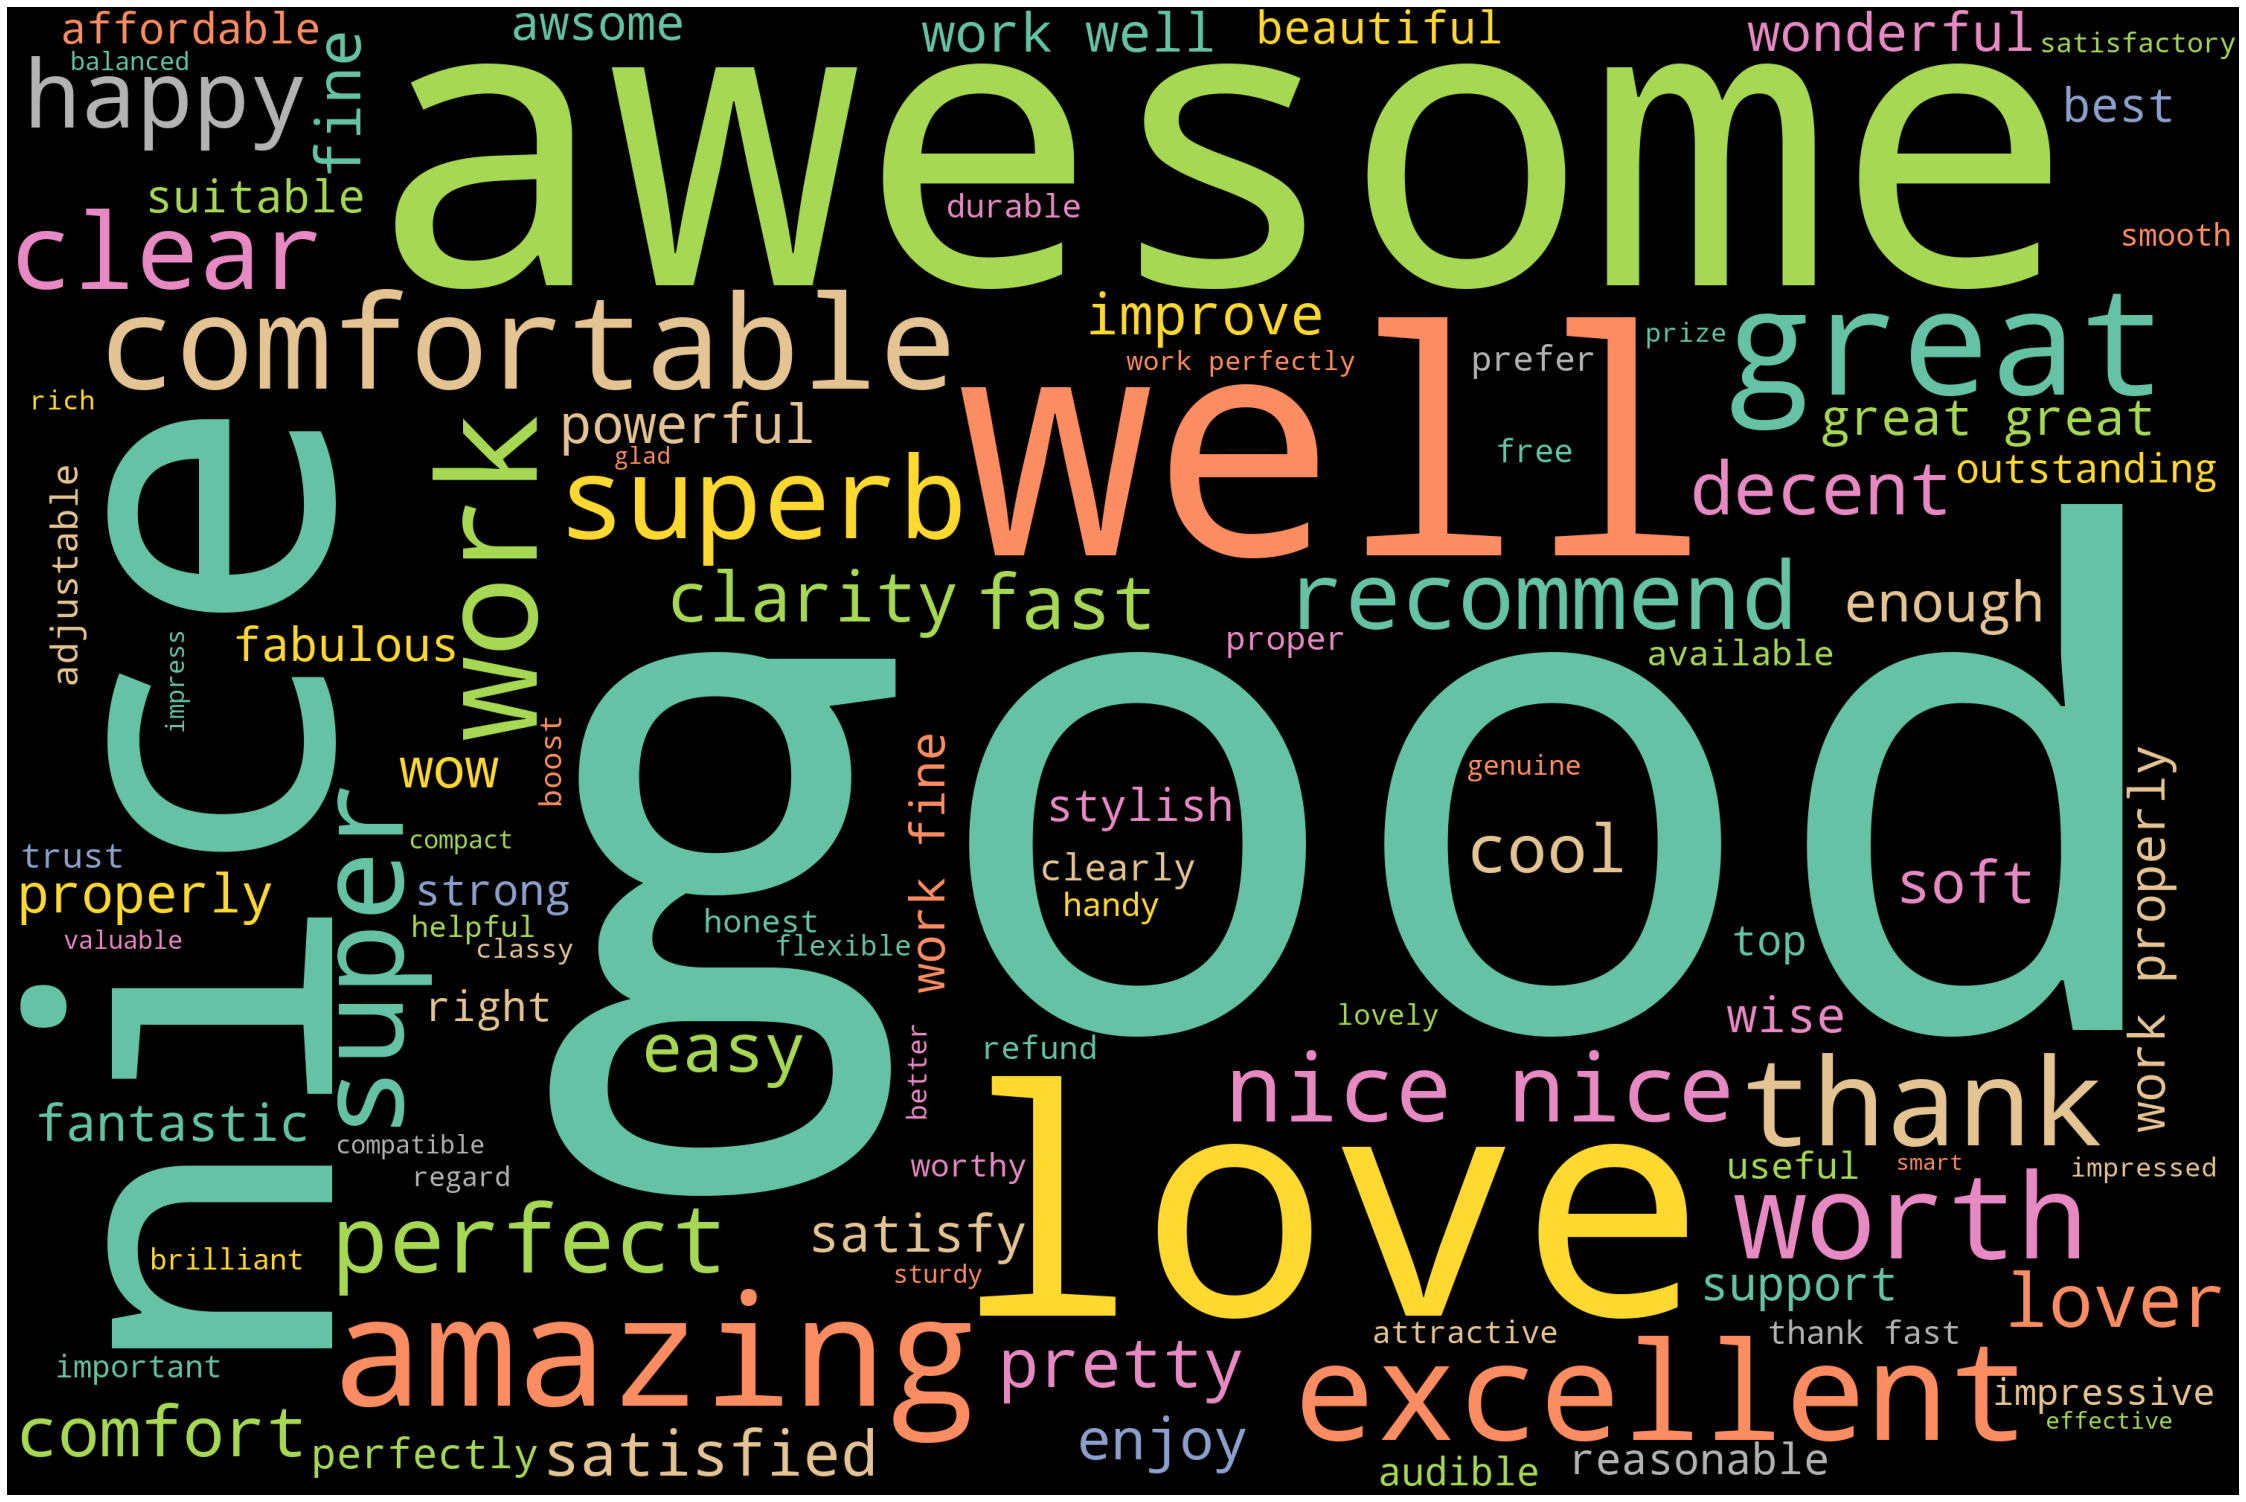

In [33]:
# positive word cloud
# Choosing the only words which are present in poswords

pos_review = " ".join ([w for w in lemmas if w in poswords])

wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2').generate(pos_review)
# Plot
plot_cloud(wordcloud)

In [34]:
with open("G:/Data science/assignment/text minning(done)/negative-words.txt","r",encoding = "ISO-8859-1") as neg:
    negwords = neg.read().split("\n")
    
negwords = negwords[36:]
print(negwords)

['accusations', 'accuse', 'accuses', 'accusing', 'accusingly', 'acerbate', 'acerbic', 'acerbically', 'ache', 'ached', 'aches', 'achey', 'aching', 'acrid', 'acridly', 'acridness', 'acrimonious', 'acrimoniously', 'acrimony', 'adamant', 'adamantly', 'addict', 'addicted', 'addicting', 'addicts', 'admonish', 'admonisher', 'admonishingly', 'admonishment', 'admonition', 'adulterate', 'adulterated', 'adulteration', 'adulterier', 'adversarial', 'adversary', 'adverse', 'adversity', 'afflict', 'affliction', 'afflictive', 'affront', 'afraid', 'aggravate', 'aggravating', 'aggravation', 'aggression', 'aggressive', 'aggressiveness', 'aggressor', 'aggrieve', 'aggrieved', 'aggrivation', 'aghast', 'agonies', 'agonize', 'agonizing', 'agonizingly', 'agony', 'aground', 'ail', 'ailing', 'ailment', 'aimless', 'alarm', 'alarmed', 'alarming', 'alarmingly', 'alienate', 'alienated', 'alienation', 'allegation', 'allegations', 'allege', 'allergic', 'allergies', 'allergy', 'aloof', 'altercation', 'ambiguity', 'ambi

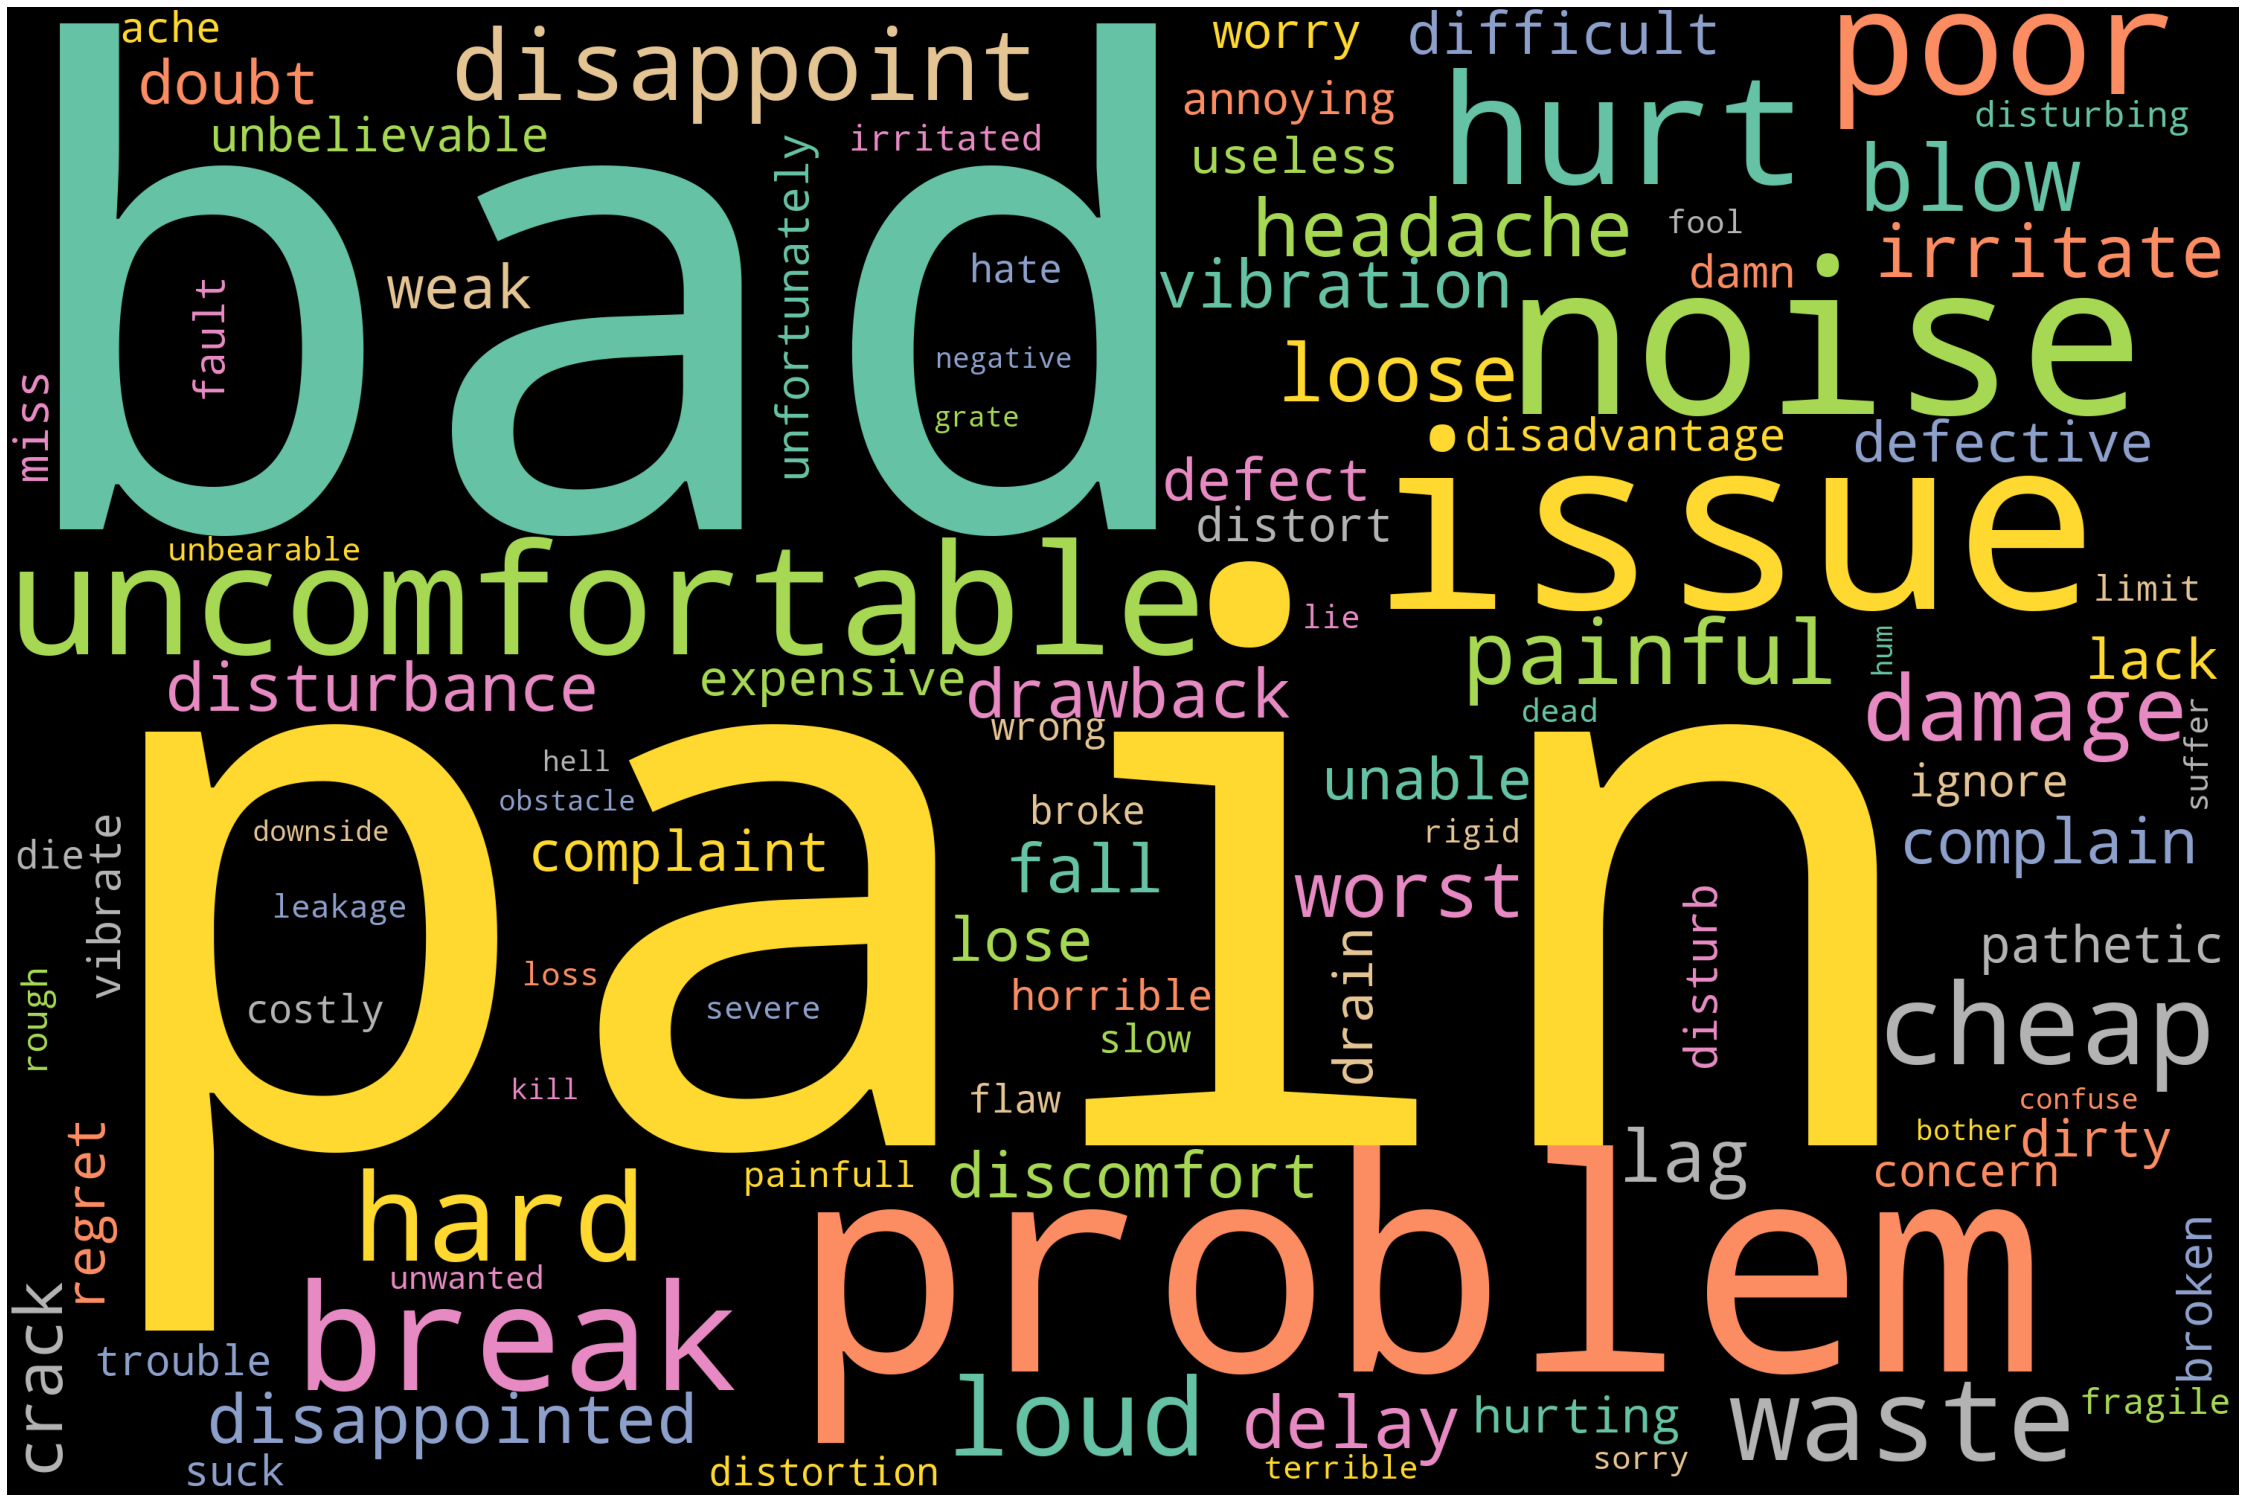

In [36]:
# negative word cloud
# Choosing the only words which are present in negwords
neg_review = " ".join ([w for w in lemmas if w in negwords])

wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(neg_review)
#Plot
plot_cloud(wordcloud)
